# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Kemal Fasya]
- **Email:** [kemalfasya2003@gmail.com]
- **ID Dicoding:** [dbrandlazz]

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata peminjaman sepeda setiap jam, dan bagaimana fluktuasinya sepanjang hari?

- Bagaimana cuaca mempengaruhi jumlah rata-rata peminjaman?

- Bagaimana kenaikan atau penurunan rata-rata peminjaman terkait dengan hari libur tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca dataset
df_day = pd.read_csv("dataset/day.csv", delimiter=",")
print(df_day.shape)
df_day.head()


(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Read dataset
df_hour = pd.read_csv("dataset/hour.csv", delimiter=",")
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
# Menggabungkan DataFrame
bike_df = pd.merge(df_hour, df_day, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Assessing Data

In [26]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [27]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [28]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

In [29]:
# Menampilkan tipe data pada atribut dalam dataset
bike_df.dtypes

instant_hour         int64
dteday              object
season_hour          int64
yr_hour              int64
mnth_hour            int64
hr                   int64
holiday_hour         int64
weekday_hour         int64
workingday_hour      int64
weathersit_hour      int64
temp_hour          float64
atemp_hour         float64
hum_hour           float64
windspeed_hour     float64
casual_hour          int64
registered_hour      int64
cnt_hour             int64
instant_day          int64
season_day           int64
yr_day               int64
mnth_day             int64
holiday_day          int64
weekday_day          int64
workingday_day       int64
weathersit_day       int64
temp_day           float64
atemp_day          float64
hum_day            float64
windspeed_day      float64
casual_day           int64
registered_day       int64
cnt_day              int64
dtype: object

In [30]:
# Menampilkan nama atribut(kolom) dalam dataset
bike_df.columns

Index(['instant_hour', 'dteday', 'season_hour', 'yr_hour', 'mnth_hour', 'hr',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'instant_day', 'season_day', 'yr_day',
       'mnth_day', 'holiday_day', 'weekday_day', 'workingday_day',
       'weathersit_day', 'temp_day', 'atemp_day', 'hum_day', 'windspeed_day',
       'casual_day', 'registered_day', 'cnt_day'],
      dtype='object')

In [32]:
bike_df.isna().sum()

instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64

In [33]:
jumlah_duplikasi = bike_df.duplicated().sum()
print("Jumlah duplikasi: {}".format(jumlah_duplikasi))

Jumlah duplikasi: 0


In [34]:
# Menampilkan 5 data teratas dalam dataset
bike_df.head(5)

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [35]:
# Menampilkan 5 data terbawah dalam dataset
bike_df.tail(5)

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,...,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729


In [36]:
# Menampilkan ringkasan statistik untuk dataset bike_sharing
bike_df.describe()

,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Semua jenis data telah diperiksa dan tidak ditemukan masalah.

## Exploratory Data Analysis (EDA)

### Explore ...

In [44]:
# Menambahkan label cuaca
label_cuaca = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}

bike_df['weather_label'] = bike_df['weathersit_day'].map(label_cuaca)

In [45]:
bike_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


In [14]:
bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

,weather_label,cnt_day
2,Hujan Ringan,1914.700855
0,Berawan,4062.717595
1,Cerah,4895.177083


In [15]:
bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [16]:
bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [17]:
bike_df['registered_hour'].sum()

2672662

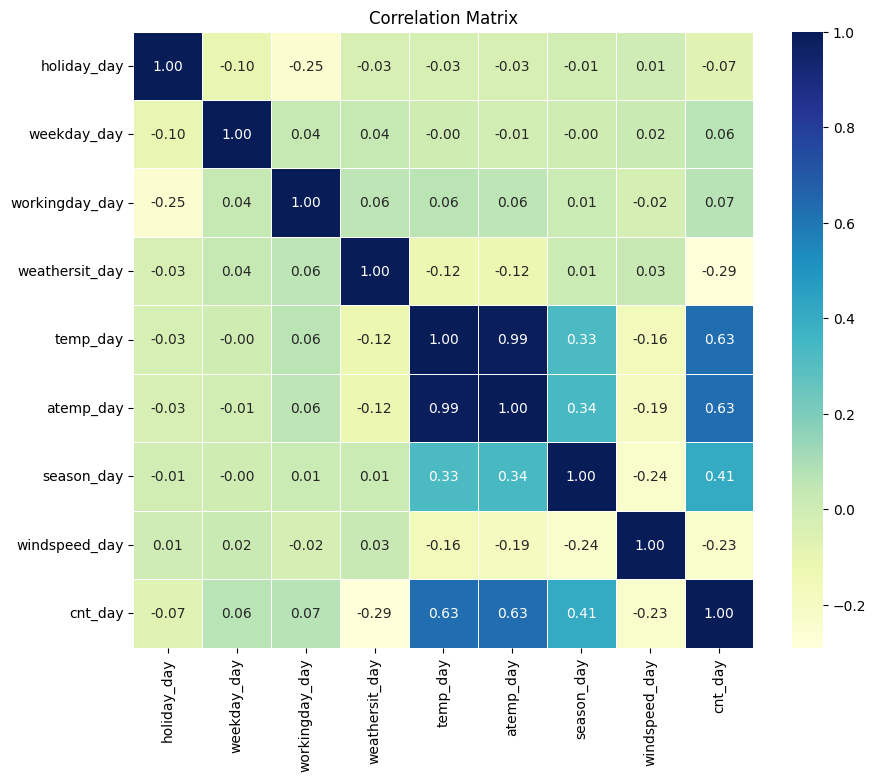

In [38]:
# Memilih kolom numerik untuk korelasi
numerical_columns = [
    "holiday_day", "weekday_day", "workingday_day", "weathersit_day",
    "temp_day", "atemp_day", "season_day", "windspeed_day", "cnt_day"
]

# Ekstraksi matriks korelasi
correlation = bike_df[numerical_columns].corr()

# Membuat heatmap untuk visualisasi dengan warna yang menarik
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)  # Mengubah warna menggunakan palet 'YlGnBu'
plt.title("Correlation Matrix")
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berapa rata-rata peminjaman sepeda setiap jam, dan bagaimana fluktuasinya sepanjang hari?

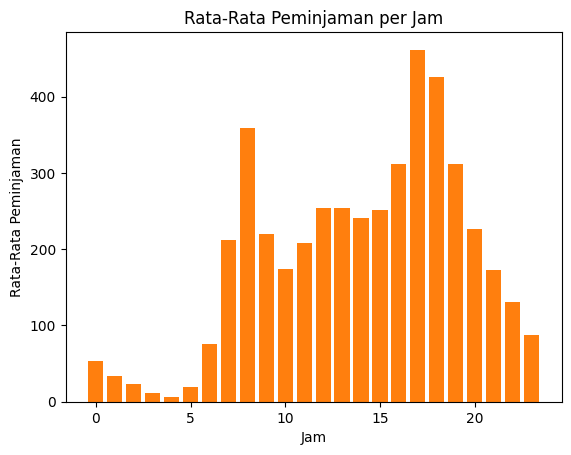

In [39]:
# Menghitung rata-rata peminjaman sepeda untuk setiap jam
rental_jam = bike_df.groupby('hr')['cnt_hour'].mean()

# Membuat bar plot dari data rata-rata peminjaman per jam
plt.bar(rental_jam.index, rental_jam.values, color='#ff7f0e')  

# Menambahkan judul, label sumbu x dan y pada plot
plt.title('Rata-Rata Peminjaman per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Peminjaman')

# Menampilkan plot
plt.show()

Rata-rata peminjaman sepeda mencapai puncaknya pada jam 17 dan 18, sementara paling rendah pada jam 4.

### Pertanyaan 2:

Bagaimana cuaca mempengaruhi jumlah rata-rata peminjaman?

C:\Users\Asus\AppData\Local\Temp\ipykernel_12560\2347676575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt_day', y='weather_label', data=avg_weather, palette='rocket_r')


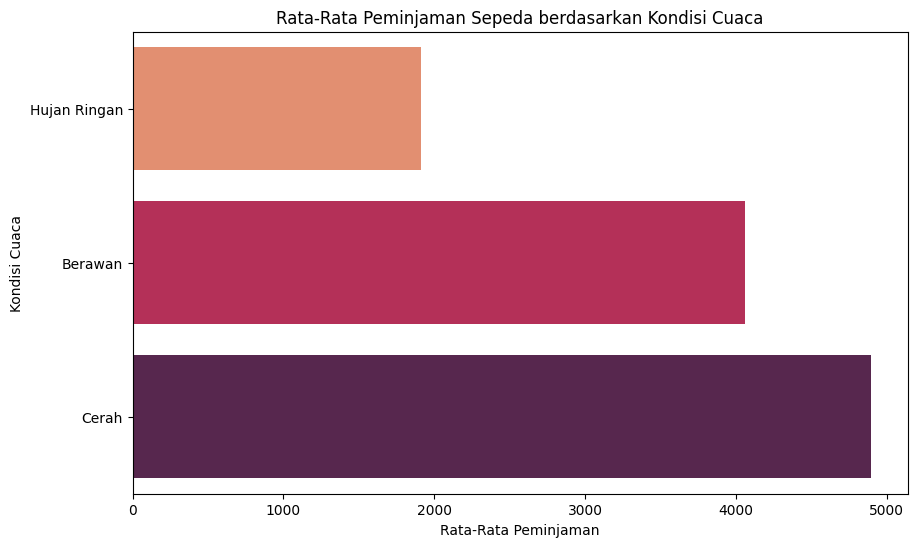

In [47]:
# Menghitung rata-rata peminjaman sepeda berdasarkan kondisi cuaca
avg_weather = bike_df.groupby('weather_label')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

# Membuat plot menggunakan seaborn dengan menggunakan data rata-rata peminjaman dan palet warna 'rocket_r'
plt.figure(figsize=(10, 6))
sns.barplot(x='cnt_day', y='weather_label', data=avg_weather, palette='rocket_r')  

# Menambahkan judul, label sumbu x dan y pada plot
plt.title('Rata-Rata Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Rata-Rata Peminjaman')
plt.ylabel('Kondisi Cuaca')

# Menampilkan plot
plt.show()


### Pertanyaan 3:

Bagaimana kenaikan atau penurunan rata-rata peminjaman terkait dengan hari libur tertentu?

C:\Users\Asus\AppData\Local\Temp\ipykernel_12560\3634329900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='husl')


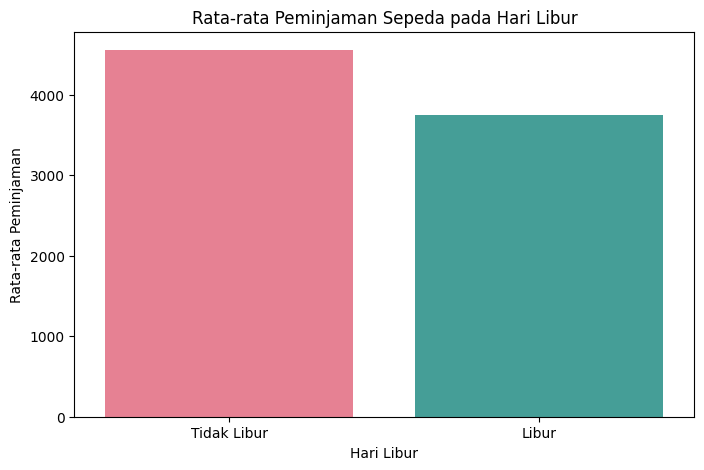

In [48]:
# Menghitung rata-rata peminjaman sepeda pada hari libur dan bukan hari libur
avg_holiday = bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values(by="cnt_day")

# Membuat bar plot menggunakan seaborn dengan data rata-rata peminjaman pada hari libur dan bukan hari libur, serta menggunakan palet warna 'husl'
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='husl')  

# Menambahkan judul, label sumbu x dan y pada plot, serta mengganti label pada sumbu x dengan 'Tidak Libur' dan 'Libur'
plt.title('Rata-rata Peminjaman Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])

# Menampilkan plot
plt.show()

## Conclusion

- Conclution pertanyaan 1: Orang lebih sering menyewa sepeda pada pagi dan sore hari, khususnya pada jam 8 pagi dan 6 sore.
    - Pola Harian Transportasi: Pada jam 8 pagi, banyak orang menggunakan sepeda untuk pergi ke tempat kerja
    atau sekolah, dan pada jam 6 sore, sepeda menjadi pilihan utama untuk pulang ke rumah setelah bekerja.
    - Aktivitas Rekreasi dan Kesehatan: Jam 8 pagi dan 6 sore juga cocok untuk berolahraga dan bersantai dengan bersepeda, baik untuk memulai hari dengan semangat atau untuk santai setelah bekerja.
    - Pengaruh Kondisi Cuaca: Cuaca yang bagus pada pagi dan sore hari cenderung membuat orang lebih tertarik untuk bersepeda. Ini karena cuaca yang bagus membuat kita lebih nyaman untuk beraktivitas di luar ruangan, termasuk bersepeda.
- Conclution pertanyaan 2: Cuaca yang cerah sangat memengaruhi seberapa sering sepeda disewa. Orang lebih suka menyewa sepeda saat cuaca cerah.
    - Cuaca Bagus untuk Aktivitas di Luar Ruangan: Saat cuaca cerah, kita merasa lebih nyaman untuk melakukan aktivitas di luar ruangan seperti bersepeda. Orang lebih suka bersepeda saat cuaca cerah karena tidak khawatir terganggu oleh hujan atau cuaca buruk.
    - Minat Tinggi saat Cuaca Baik: Banyak orang menyukai bersepeda sebagai hobi atau rekreasi, dan cuaca cerah membuat mereka lebih tertarik untuk menyewa sepeda dan menikmati perjalanan di bawah sinar matahari.
- Conclution pertanyaan 3: Rata-rata penyewaan sepeda lebih tinggi pada hari-hari kerja (Senin-Jumat).
    - Hubungan dengan Hari Kerja: Ini mungkin karena banyaknya aktivitas transportasi pada hari-hari kerja ketika orang pergi atau pulang dari pekerjaan.
    - Pengaruh Aktivitas Sehari-hari: Penyewaan sepeda yang meningkat pada hari-hari kerja bisa jadi karena kebutuhan orang untuk beraktivitas sehari-hari seperti bekerja, sekolah, atau berbelanja. Sepeda sering dipilih untuk perjalanan pendek, terutama pada hari-hari di mana orang memiliki rutinitas harian.
    - Penyewaan oleh Kelompok Tertentu: Mungkin ada kelompok tertentu, seperti pekerja atau pelajar, yang lebih sering menggunakan layanan penyewaan sepeda pada hari-hari kerja.